# Supervised Learning: Linear Regression

This is a note on Linear Regression that I synthesize from the following sources:

1/ **Learning Python for Data Analysis and Visualization - Udemy course by Jose Portilla**

2/ **Data Science and Machine Learning with Python - Hands On! - Udemy course by Frank Kane**

3/ **Introduction to Programming for Big Data - NICO Northwestern by Adam Pah and Luis Amaral**

Before we start, a few notes and example from the youtube series:

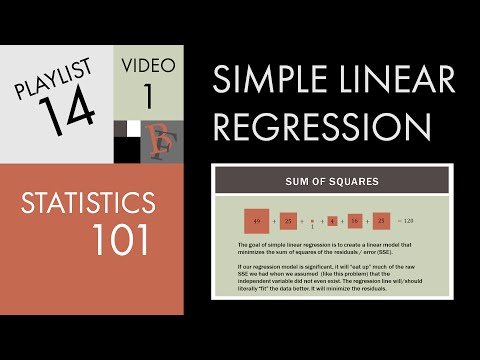

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ZkjP5RJLQF4")

### Note #1

* Assume you collect 6 data points of "tips" of 6 meals. But you don't have the bill of the meals. How can you predict the tip of the next meal? So, in this case, tips is Y (dependent), bill is X (independent). Without X, the best prediction you can give for the next meal is the mean of those 6 data points of tips. The **"residuals"** (aka **"errors"**) are the differences between each of these 6 points to their means, which sum up to 0 of course. But if you sum of the squares of those residuals (called Sum of Square Residuals/Errors, aka **SSE**), then SSE is of course positive. 
* **The goal of Linear Regression is to create a linear model (a line, a plane, a hyper plane) that minimizes such SSE.**
* If now we also have the data of the meals' bills for those 6 meals (i.e. we also have the data of the independent variable X), then those information can help us do a better job in predicting the tips Y. Such information will "eat up" much of the raw SSE we had as seen above. This mean, now the regression line will/should literally "fit" the data better (give the extra info from X): it will minimize the residuals!
* Thus, LR is about **comparison** of 2 models: 
    * 1st model: **when we don't have X**, i.e. the independent variable does not even exist, then the best prediction for the dependent variable Y is simpply the mean of Y (i.e., **a flat line**)
    * 2nd model: **when we have X**, we will use SLR to do a "best-fit" line. We will determine **how good that line "fits" the data** by **comparing it to** the 1st model.
        * Note that the difference between the best-fit line and the observed value (data points) is called the **residuals** (or **errors**).
        * The residuals are squared and then added together to generate **sum of squares residuals/erros, SSE**
    
* Q: why do we square those residuals? Simple answer is: the same reason as when we square the deviation to calculate the variance or standard deviation std. By squaring, we can make sure they are not negative. Also, another reason for squaring is: it will emphasize the large deviations, i.e., it will exaggerate the points that are further away from the prediction. The larger the deviations, the heavier the punishments are. And our goal is thus, to minimize such deviation. Other method is may be to sum the absolute values. This will not exaggerate the large deviations. 
* 

### Note #2

* Note that: **Simple LR** belongs to a specific area of statistics, called **bi-variate statistics**: it is a child of Anova and Correlation.
![caption](./SLR_Correlation_Anova.png)
![caption](./SLR_algebra_of_line.png)
* $E(y)= \beta_0 + \beta_1 x$ is pretty much the same thing as $y= \beta_0 + \beta_1 x + \epsilon$. That is the mean or expected value of y, for a given x. That is the term that will explain part of the variation in y, whereas $\epsilon$ "explains" the remaining "unexplained" variations.
* 
![caption](./SLR_model.png)
* The E(y) is actually the mean of a whole distribution of that y for that given x. Since our model is never perfect, so any E(y) we come up with is **at best an approximation**. That distribution of y for that given x can the narrow as in the left, or can be as wide as on the right. In LR, we want something like on the left, i.e. a narrower distribution. Just remember, whenever we mention E(y), we don't mean a point, but a distribution around that point.
![caption](./SLR_distr_of_y.png)
*
![caption](./SLR_general_reg_lines.png)
* In functional terms, E(y) and $\hat{y}$ are the same. But by writing $\hat{y}$, we indicate that we are using the sample data.
![caption](./SLR_eq_with_estimates.png)
* So now this is similar to before, just replace E(y) by $\hat{y}$ in the above graph of distributions.
* 
![caption](./SLR_when_slope_0.png)
*
![caption](./SLR_pattern_matching.png)
* Now, assume we also have the meal bill (i.e. independent X). Each data point represent the relationship between the bill amount and the tip amount. Note that what we are assuming here is that **the tips amount depends on the original bill amount** (that's what we **think**, that's sort of what we are **hypothesizing**, i.e., we hypothesize that in general, a higer bill gives a higher tip and lower bill gives lower tip). Now **it is important to first look at the scatter plot and to see that it appears to have a linear relationship from left to right** (remember to verify this before doing any LR)
* **Most importantly, if that line reduces the SSE significantly (as compared to the model when we only use the mean of the tip withou any information about X), then that's when we will say that our LR model is "good" in a qualitative sense. Quantitatively, we'll figure out how to model that "goodness" concretely later. But generally, if SSE reduces, then we know it is good.

## Note #3

*
![caption](./SLR_LS_criterion.png)
![caption](./SLR_step1_scatter_plot.png)
* Note that if you cannot (use eyes is enough, doing more complicated thing is not necessary) visualize a line through the data and the data is randomly scatter all over the place then just stop using LR! It is not the right technique then!
![caption](./SLR_step2_visualize_a_line.png)
* Step 3: correlation is optional, but it's a good thing to do, because the correlation coeff is involved in **later things in SLR** and also in **multile LR**. So, you might as well go ahead and do it anyway. In this case, a correlation coeff r=0.866 indicate a strong, positive, linear relationship. So in fact, this confirm our earlier intuition/visualization that there is is fact a strong linear relationship between X and Y.
![caption](./SLR_step3_correlation_optional.png)
* Step 4: To find a centroid, find the mean of each variable X and Y, then graph that. Note that to plot a LR line, you need 2 point. This centroid is already one point that the line needs to pass through. Now just need to find another point.
![caption](./SLR_step4_centroid.png)
* Step 5: Find the slope $b_1$ first before you can find the intercept $b_0$. The calculation is so simple, we only need to calculate the means of x and y (which we already did when finding the centroid).
![caption](./SLR_step5_calculation_1.png)
![caption](./SLR_step5_calculation_2.png)
![caption](./SLR_step5_calculation_3.png)
![caption](./SLR_step5_calculation_4.png)
![caption](./SLR_step5_calculation_5.png)
* It doesn't matter which order you write your eq, depending on the software too. Just make you you know which coeff is which.
* Regression is quite sensitive to rounding: the eq in the top is given by excel, the eq below is by our calculation. A good practice is using up to 4 decimal places.
![caption](./SLR_step5_your_reg_line_6.png)
![caption](./SLR_step5_ploting_line_7.png)
* Depending on the problem, the intercept may of may not make sense. What is more important is the slope $b_1$
![caption](./SLR_step5_interpretation_8.png)


# Note #4:

## But, is this regression line model any good?!?!? Let's find out!
* How does the the LR line fits the data it models? The LR model is unique to the data it represents. Adding or changing any data point will most certainly change the regression model.
* The model is also **only valid** for the range of data under its analysis. It is not appropriate to extrapolate the data that are above or below the range of the data being evaluated.
* So after the LR line has been calculated, how much better it is as compared to the model using the mean of the dependent variable alone? To evaluate that, need to calculate the SSE like in the previous note. However, now we will calculate that using the LR line, not the mean of the dependent variable line.
* Finally, we will be able to quantify the fit of the LR by using a simple ratio or percentage called the **coefficient of determination**.
*
![caption](./SLR_a_tale_of_2_lines.png)
![caption](./SLR_when_slope_is_0.png)
![caption](./SLR_observed_vs_predicted.png)
![caption](./SLR_residuals_errors.png)
![caption](./SLR_SSE.png)
![caption](./SLR_SSE_comparison.png)
![caption](./SLR_SSE_comparison_2.png)
![caption](./SLR_SSE_comparison_3.png)
![caption](./SLR_coeff_of_determination.png)
![caption](./SLR_coeff_of_determination_2.png)
* Using a statistical software package, you'll get the table above. So we'll have SS (sum of squares of 3 kinds: TSS, RSS, SSE) and then mean square MS, F-statistic, signficant level (just like we did in ANOVA). In this example, the F-stat=11.9 is very large, and the significance level F is 0.0258, **which is significant at the 0.05 level**.

### So, there is a relationship betweel Regression and ANOVA, in the sense that there are partitioning or allocating the total sum of square TSS (or SST) into different components: SSR and SSE. And then, we measure the ratio of these components to determine whether the model is statistically significant. So, same idea!
*
![caption](./SLR_coeff_of_determination_interpretation.png)
![caption](./SLR_3_squares_differences.png)

## And what we hope for a good fit LR model is the SSE is very low, the SSR is very high, and their sum is added up to SST, whatever that happens to be.

# Now, we go into details how to do LR in Python

In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as 
    **how to train the regressor using the fit() method**, and 
    **how to predict new labels using the predict() method**. 

We'll be analyzing a data set consisting of **house prices in Boston**. 
    
    We'll start off with **a single variable linear regression using numpy**, and 
    then move on to **using scikit learn**. 
    We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.

If you're interested in the deeper mathematics of linear regession methods, check out the [wikipedia page](http://en.wikipedia.org/wiki/Linear_regression) and also check out Andrew Ng's wonderful lectures for free on [youtube](https://www.youtube.com/watch?v=5u4G23_OohI).

In this section we will be working through linear regression with the following steps:

    Step 1: Getting and setting up the data.
    Step 2: Visualizing current data.
    Step 3: The mathematics behind the Least Squares Method.
    Step 4: Using Numpy for a Univariate Linear Regression.
    Step 5: Getting the error.
    Step 6: Using scikit learn to implement a multivariate regression.
    Step 7: Using Training and Validation.  
    Step 8: Predicting Prices
    Step 9 : Residual Plots
    

# Step 1: Getting and setting up the data.

We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then ** sklearn's built-in boston dataset.**

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

Imports for plotting

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Now import dataset from scikit learn as well as the linear_model module. Note: You may have to run a download, scikit learn will read an error and prompt you to if you don't have the datasets.

In [3]:
from sklearn.datasets import load_boston
# as compared to how to load built-in dataset in seaborn:
# tips = sns.load_dataset("tips") # The "tips" dataset in seaborn.

## Next we'll download the data set. This load_boston() is built-in

In [5]:
# Load the housing dataset
boston = load_boston()
type(boston) #sklearn.datasets.base.Bunch

sklearn.datasets.base.Bunch

### Imagine that now boston is a sklearn object (it is not a dataframe yet, we will convert it to a dataframe in a few lines, but imagine right now it is similar to a dataframe in that: we can call:
1. boston.target, which is the prices of the house. Imagine this is one col of the dataframe
2. boston.data, which is all the 13 attributes for this data. So this is another 13 cols of the dataframe.

### The boston.data is already there when we convert boston to the dataframe, then we will need to add another column of 'Price' which is this boston.target

Let's see what the data set contains

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### So, INTPUT are those 13 attributes/features.

#### OUTPUT is the 'MEDV' (median value of owner-occupied homes in $1000's. We also call it the TARGET/LABEL

## Objective: Predict the output (price of the house) based on the input attributes.

#### This is supervised learning

# Step 2: Visualizing current data

You should always try to do a quick visualization fo the data you have. Let's go ahead an make a histogram of the prices.

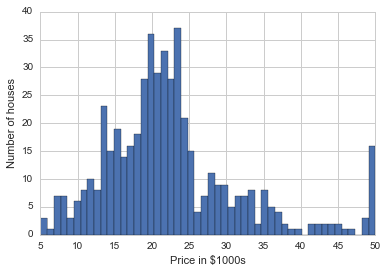

In [7]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)
# you can do that since this housing is a built-in data set, created for
# scikit-learn itself to show its capability of ML, so it's already been cleaned.
# THUS, when working with real data, it might not be clean enough for you to
# just call this method .target

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

In [8]:
boston.target # a numpy array. Remember to convert to this if the original data is a column of a dataframe.
# for example: target = np.array(target)

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [9]:
type(boston.target)

numpy.ndarray

Interesting, now let's see **a scatter plot** of **one single feature**, versus the **target**. In this case we'll use **the housing price** versus **the number of rooms** in the dwelling.

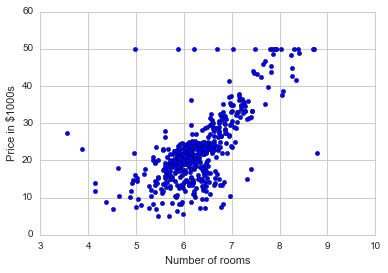

In [9]:
# Plot the column at the 5 index (Labeled RM) (Check back the dataset description)
plt.scatter(boston.data[:,5],boston.target)# : means using all data points,
# 5 means using that 6th column, RM.

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

# Doing this scatter plot is important. This verify our approach of using LR to predict Price on the basis of the number of rooms. I should have mentioned this in my interview with Amazon.com

# If being asked why I choose the number of the room as the single predictor in this SLR, then mention 2 reasons: First, by intuition the number of rooms is an important factor in determining the price. Thus, it is a reasonable starting point to do a SLR with it. Second, later we will see that when we do a MLR model with all the features included, we get back a set of estimated coefficients (slopes), each corresponds to a single feature, then we will see that the coefficient corresponding to the number of the room is positive and is the highest among all other coefficients.

# Now, if being asked at the end of the question that how do you verify that your LR model is a good model. Then, you can mention all the criteria that there are, such as R^2 value (higher better), or SSE (lower, better), etc. BUT one good way to remember is VISUALIZATION. This means you can check by simply plotting the <span style="color:red">Residuals Plot</span> explained below. NOTE that I stress the keyword: visualization! It is the best way to see which model to choose as well as to verify the chosen model! 
(However, remember though that some characteristics might be missing if just looking at the visualization alone).

Residual plots are **a good way to visualize the errors in your data**.  **If you have done a good job then your data should be randomly scattered around line zero**. 

#### If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

Great! Now we can make out **a slight trend** that **price increases along with the number of rooms** in that house, which intuitively makes sense! Now let's use scikit learn to see if we can fit the data linearly.

Let's try to do the following:

####    1.) Use pandas to transform the boston dataset into a DataFrame:
    
####    2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [12]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns (otherwise, the columns names will be 0,1,2... by default)
boston_df.columns = boston.feature_names #this feature_names method is also built-in

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now let's add the target of the boston data set, the price. We'll create a new column in our DataFrame.
** Note that boston.target is a numpy array. But here we actually set the new column of a dataframe to be equal to boston.target**

In [13]:
# Set price column for target
boston_df['Price'] = boston.target

Now let's see the resultign DataFrame!

In [14]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now, you might be reminded of the seaborn lmplot function we used during the visualization lectures. You could use it here to do a linear fit automatically!

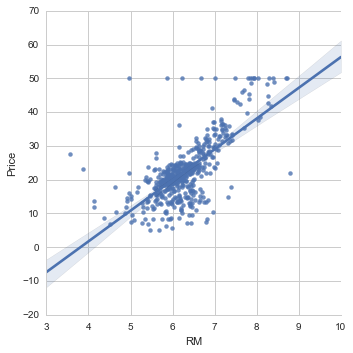

In [24]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

Check out the other built-in dataset of seaborn: tip

http://seaborn.pydata.org/generated/seaborn.lmplot.html

#### However, we won't be able to do this when we move to more complicated regression models, so we'll stay focused on using the scikit learn library!

# Step 3: The mathematics behind the Least Squares Method.

In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:
#### (i.e., to know if the line is a best-fit line)

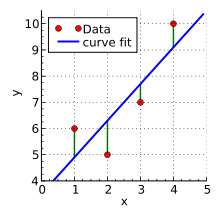

In [25]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ SSE = D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$ is **minimized**

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called **the normal equations for the least squares line**. There are further steps that can be taken in rearranging these equations  to solve for y, but **we'll let scikit-learn do the rest of the heavy lifting here**. If you want further informatino on the mathematics of the above formulas, check out this great [video](https://www.youtube.com/watch?v=Qa2APhWjQPc).

For now, we'll use **numpy to do a simple single variable linear regression.** Afterwards we'll unleash **the power of scikit learn to do a full multivariate linear regression.**

# Step 4: Using Numpy for a Univariate Linear Regression
### (i.e. redo the seaborn built-in methor on our own)
sns.lmplot('RM','Price', data=boston_df)

**Numpy** has a **built in** **Least Square Method** in its linear algebra library. We'll use this first for our **Univariate regression** and then move on to **scikit learn** for our **Multi variate regression**.

We will start by setting up the X and Y arrays for numpy to take in. An important note **for the X array**: **Numpy expects a two-dimensional array**, **the first dimension is the different example values**, and **the second dimension is the attribute number**. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So **we'll need to create a (506,1) shape array**. There are a few ways to do this, but an **easy way** to do this is by using **numpy's built-in** **vertical stack tool**, vstack.

In [19]:
# Set up X as median room values
X = boston_df.RM #this is just an array (series) of 506 housing data points
# check the shape of X right now: X.shape --> give (506L,)

In [20]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, dtype: float64

In [21]:
X.shape

(506,)

In [22]:
type(X) #pandas.core.series.Series

pandas.core.series.Series

In [23]:
X=np.array(X) #classic way to convert X to numpy array.

In [24]:
X

array([ 6.575,  6.421,  7.185,  6.998,  7.147,  6.43 ,  6.012,  6.172,
        5.631,  6.004,  6.377,  6.009,  5.889,  5.949,  6.096,  5.834,
        5.935,  5.99 ,  5.456,  5.727,  5.57 ,  5.965,  6.142,  5.813,
        5.924,  5.599,  5.813,  6.047,  6.495,  6.674,  5.713,  6.072,
        5.95 ,  5.701,  6.096,  5.933,  5.841,  5.85 ,  5.966,  6.595,
        7.024,  6.77 ,  6.169,  6.211,  6.069,  5.682,  5.786,  6.03 ,
        5.399,  5.602,  5.963,  6.115,  6.511,  5.998,  5.888,  7.249,
        6.383,  6.816,  6.145,  5.927,  5.741,  5.966,  6.456,  6.762,
        7.104,  6.29 ,  5.787,  5.878,  5.594,  5.885,  6.417,  5.961,
        6.065,  6.245,  6.273,  6.286,  6.279,  6.14 ,  6.232,  5.874,
        6.727,  6.619,  6.302,  6.167,  6.389,  6.63 ,  6.015,  6.121,
        7.007,  7.079,  6.417,  6.405,  6.442,  6.211,  6.249,  6.625,
        6.163,  8.069,  7.82 ,  7.416,  6.727,  6.781,  6.405,  6.137,
        6.167,  5.851,  5.836,  6.127,  6.474,  6.229,  6.195,  6.715,
      

In [25]:
X.shape #same as before when X is still a small DF. Now X is already a numpy array and the shape is still the same.

(506,)

In [26]:
type(X) #but now, the type has been changed to numpy array instead of pandas.core.series.Series

numpy.ndarray

### Now use np.vstack to convert the col of a DF to numpy array

In [57]:
# Use vstack to make X two-dimensional
X = np.vstack(boston_df.RM)
# check the shape of X right now: X.shape --> give (506L,1L). This difference
# is what numpy needs: how many values you have: 506, and how many attributes
# there was: 1 (i.e., the ave number of rooms).
# now, X is already a numpy array

# Set up Y as the target price of the houses. This is straightforward.
Y = boston_df.Price

#### Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:
$$y=mx+b$$
which we can rewrite using matrices:
$$y=Ap$$
where:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
and
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$

This is the same as the first equation if you carry out the linear algebra. 
So we'll **start by creating the A matrix using numpy**. We'll do this by creating **a matrix in the form [X 1]**, so we'll **call every value in our original X using a list comprehension** and then **set up an array in the form [X 1]**

In [28]:
X #check what X is now

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [32]:
X.shape

(506, 1)

In [33]:
type(X)

numpy.ndarray

In [53]:
X1 = boston_df.RM
X1=np.array(X1)
X1 = np.array( [ [value,1] for value in X1 ] ) #value is simply a number in X
X1

array([[ 6.575,  1.   ],
       [ 6.421,  1.   ],
       [ 7.185,  1.   ],
       ..., 
       [ 6.976,  1.   ],
       [ 6.794,  1.   ],
       [ 6.03 ,  1.   ]])

Note that the difference between simply doing X=np.array(boston_df.RM) and X=np.vstack(boston_df.RM) is:
* np.array(boston_df.RM) returns a numpy array of shape (506,)
+ np.vstack(boston_df.RM) returns a numpy array of shape (506, 1), i.e. an array of arrays, i.e. a matrix with only 1 column

#### Now, need to make X an array of arrays.

In [58]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] ) #value is an array of only 1 element. So it is more general than using just 
#np.array like for in X1, in the sense that if we have more features, this will still work since then value can be extended
#to an array of multiple elements, while value in the case of X1 is just a number.
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [54]:
X.shape

(506, 2)

In [55]:
type(X)

numpy.ndarray

Great! Now we can get the best fit values! Using ** least squares**

In [59]:
# Now get out m and b values for our best fit line: y=mx + b
m, b = np.linalg.lstsq(X, Y)[0]
# .linalg: I think this to tell numpy to use LR
# .lstsq: to tell numpy the criteria we are using is least square

Finally let's plot it all together! Note that we use the original format of the boston information. We only did our matrix transformations to utilize the numpy least square method.

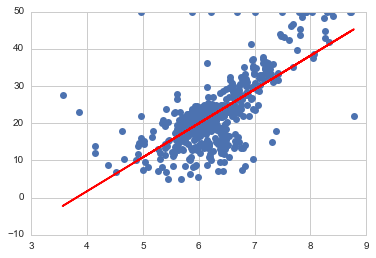

In [64]:
# First the ORIGINAL SCATTER points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o') #change to 's' if want square bullets

# Next the BEST FIT LINE
x= boston_df.RM # NOTE THAT WE USE lower case x here, not X
# since X's format was modified as (506L,1L)
# we just want the origial col of ave number of room here as x
plt.plot(x, m*x + b,'r',label='Best Fit Line')
# actually, you can also do plt.plot(X, m*X + b,'r',label='Best Fit Line'), but the the figure appears on different scale.
#not sure why.

### So, the above plot, we just re-create the seaborn plot when we did using seaborn built-in method: 
sns.lmplot('RM','Price', data=boston_df) --> actually, also provide more info on the plot

### Here, we were able to redo it on our own using numpy. But the point is to show how powerful/convenient that seaborn can be.

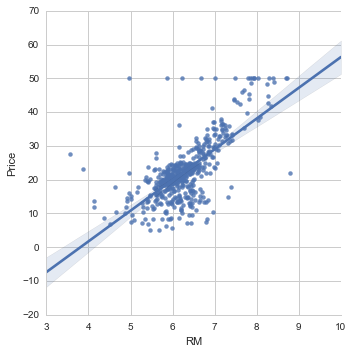

In [65]:
sns.lmplot('RM','Price', data=boston_df)

# Step 5: Getting the error 

Great! We've just completed a **single variable regression** using the **least squares method** with Python! Let's see if we can find **the error in our fitted line**. Checking out the documentation [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html), we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. **This was the summed $D^2$ value we discussed earlier.** 

It's probably **easier to understand** the root mean squared error, which is similar to the standard deviation. In this case, **to find the root mean square error we divide by the number of elements and then take the square root**. There is also **an issue of bias and an unbiased regression**, but we'll delve into **those topics later.**

For now let's see how we can get **the root mean squared error** of the line we just fitted.

In [68]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)


(array([  9.10210898, -34.67062078]), array([ 22061.87919621]), 2, array([ 143.99484122,    2.46656609]))


In [69]:
result
# interpreting this result (read the documentation given in the link above)
# array([  9.10210898, -34.67062078]): our coeff estimates, so beta1=9.10 is the slope
# beta0 = -34.67 is the intercept, which is not meaningful in this case: when the house has 0 room,
# its price cannot be negative!
# array([ 22061.87919621]) is the SSE (i.e. sum of squares errors/residual.)
# 2 is just the rank of the matrix A=[x 1]
# array([ 143.99484122,    2.46656609]) are the singular values of the matrix A = [x 1]

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [70]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error. We know this by reading back the documentation
# the total error is stored at index 1. Note that a lot of machine learning
# you'll need to know your tool as well as the documentations.
# here, error_total is simply the sum of squares error SSE (sum of square of the residuals)
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


Since **the root mean square error (RMSE) corresponds approximately to the standard deviation** we can now say that **the price of a house won't vary more than 2 times the RMSE 95% of the time**. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

## Note that up to now, we have used all 506 data points as training samples. And thus the root of the SSE above is just training root SSE and not test root SSE. That says, we haven't done any prediction yet! In next step we jump in to MLR while also using all 506 data points. But in steps 7, 8, we will actually redo the SLR using Cross-Validation and that means we divide our data set to training and test set (by default, 75-vs-25 ratio).

# Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

**We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.**

The **sklearn.linear_model.LinearRegression** class is **an estimator**. Estimators predict a value based on the observed data. In scikit-learn, <span style="color:red">**all estimators** implement the **fit()** and **predict()** methods.</span> The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

### Use .fit() on the training set to find the estimated coeffs.

### Then use .predict() on the test set and use the obtained estimated coeffs to predict.

In [73]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Next, we **create** a **LinearRegression object**, afterwards, **type lm. then press tab to see the list of methods availble on this object**.

In [74]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [109]:
type(lreg) #sklearn.linear_model.base.LinearRegression

sklearn.linear_model.base.LinearRegression

The functions we will be using are:

**lreg.fit() which fits a linear model**

**lreg.predict() which is used to predict Y using the linear model with estimated coefficients**

**lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination)**

A perfect R^2 value is 1. The higher it is from 0, the better fit our model is.

SST = SSE + SSR (Total sum of squares = sum of squares errors + sum of squares regression)

r^2 = SSR/SST: the percent of the variation in Y that is explained by X using this LR model.


We'll start the multi variable regression analysis by **seperating our boston dataframe into the data columns and the target columns**:

In [75]:
# Input Columns: just copy of the DF with dropping the output col
X_multi = boston_df.drop('Price',1) #use 1 here to indicate we drop col.

# Targets
Y_target = boston_df.Price # just extract out the output col.

# NOTE THAT IN THE ABOVE, WE DIDN'T SET inplace=True (by default, it is False)
# SO THESE WILL NOT AFFECT OUR ORIGINAL DF.

In [82]:
X_multi.shape #506 samples, 13 attributes

(506, 13)

In [83]:
Y_target.shape # 505 samples, only 1 target

(506,)

Finally, we're ready to pass the X and Y using the linear regression object.

In [76]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This is a note from the link above about LR in scikit-learn:
(http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


**Parameters (i.e., inputs)**: 
* X_multi:  numpy array or sparse matrix of shape [n_samples,n_features] of training data
* Y_target: numpy array of shape [n_samples, n_targets] of target value (i.e., also training data)

The other **optimal** paras are:
* sample_weight (=None by default): numpy array of shape [n_samples]
Individual weights for each sample
* fit_intercept: If set to false, no intercept will be used in calculations (e.g. data is expected to be already centered).
* normalize: If True, the regressors X will be normalized before regression. When the regressors are normalized, note that this makes the hyperparameters learnt more robust and almost independent of the number of samples. The same property is not valid for standardized data. However, if you wish to standardize, please use preprocessing.StandardScaler before calling fit on an estimator with normalize=False.
* copy_X: If True, X will be copied; else, it may be overwritten.
* n_jobs: The number of jobs to use for the computation. If -1 all CPUs are used. This will only provide speedup for n_targets > 1 and sufficient large problems.

** Attributes (i.e., outputs)** are: Since .fit() returns an instance of self, the outputs will have the "_" at the end of them:
* coef_ : array, shape (n_features, ) or (n_targets, n_features). 
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.
* residues_ : array, shape (n_targets,) or (1,) or empty. 
Sum of residuals. Squared Euclidean 2-norm for each target passed during the fit. If the linear regression problem is under-determined (the number of linearly independent rows of the training matrix is less than its number of linearly independent columns), this is an empty array. If the target vector passed during the fit is 1-dimensional, this is a (1,) shape array.
* intercept_ : array. 
Independent term in the linear model.


Let's go ahead check the **intercept** and **number of coefficients**(which should be 13 if you still remember).

In [77]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 36.49 


In [78]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 13 


In [79]:
lreg.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [84]:
type(lreg.coef_)

numpy.ndarray

Great! So we have basically made **an equation for a line**, **but instead** of **just one coefficient m and an intercept b**, we **now have 13 coefficients**. To get an idea of what this looks like check out the [documentation](http://scikit-learn.org/stable/modules/linear_model.html) for this equation:
$$ y(w,x) = w_0 + w_1 x_1 + ... + w_p x_p $$

Where $$w = (w_1, ...w_p)$$ as the coefficients and $$ w_0 $$ as the intercept 

#### What we'll do next is set up a NEW DataFrame showing all the 13 Features and all their 13 estimated coefficients obtained from the linear regression.

First, review what the original dataframe is:

In [41]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
# Create a column of features names from the original boston dataframe
# I mean just grab the list of col names from boston_df and make these the
# the data value of a new dataframe (where no name exists yet for col, and 
# where then index names are still by default from 0 to 13)
coeff_df = DataFrame(boston_df.columns)
# now, we name the col of that newly created DF
coeff_df.columns = ['Features'] 

# Set a new column lining up the coefficients from the linear regression
# by converting a numpy array to a pandas Series, i.e. which can be assigned
# directly as a new column of an existing dataframe. Here, the entries of
# this col will be filled top down using values in the numpy array.
# The remaining entries in the column with no corresponding values in the array
# will be filled with "NaN".
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Just like we initially plotted out, it seems **the highest correlation (3.804752) between a feature and a house price was the number of rooms**.

## Thus, it looks like the ave number of rooms is the most important factor that affect the price of a house.

Now let's move on to Predicting prices!

# Again, use this as another confirmation why we choose the number of room as the single predictor in the previous SLR. Make sure you mention this as a hindsight when being asked why choose SLR.

# Step 7: Using Training and Validation 

In a dataset **a training set is implemented to build up a model**, while **a validation set is used to validate the model built**. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is ** *randomly* **.

Fortunately, **scikit learn has a built in function** specifically for this called **<span style="color:red">train_test_split</span>**. (in full: <span style="color:red">sklearn.cross_validation.train_test_split</span>)



The **parameters** passed are your **X and Y**, then **optionally test_size** parameter, representing the **proportion** of the dataset to include in the **test** split. As well a train_size parameter (how much of the data you want to be in the training set). You can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

**By default, training set takes 75% and testing set takes 25%.**

In [86]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [87]:
boston_df.Price

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, dtype: float64

In [91]:
# BE CAREFUL WITH THE ORDER
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X,boston_df.Price)
# X is just the array we made earlier for uni-variate LR
# and boston_df.Price is just our output, i.e. Y

Let's go ahead and see what the output of the train_test_split was:

In [92]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


#### So, scikit-learn automatically do the split for you according to the ratio it thinks will be best.

Great! **Now that we have our training and testing sets** we can continue on to predicting prices based on the multiple variables.

# Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and **try to use them to predict house prices**. We'll use our training set for the prediction and then use our testing set for validation.

In [93]:
# Create our regression object (again, redo this just like in step 6 when
# we use MLR with all 506 data points as training). Everytime before doing
# LR, you would need to reset this.
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now run a prediction on both the X training set and the testing set.

### Note that this prediction is done on both sets, but the estimated coeffs that it use to do this prediction is obtained from the training set only. Thus, you would expect that the SSE (or mean of itself) is lower on the training set than on the test set.

In [96]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train) #gives an estimate of Y_train, to compare with Y_train
pred_test = lreg.predict(X_test)#gives an estimate of Y_test, to compare with Y_test
# make predictions for both sets, and then compare how well they match

In [97]:
#type(X_train) #numpy.ndarray
type(pred_train) #numpy.ndarray

numpy.ndarray

Now we will get **the mean square error** (instead of the RMSE we did for uni-variate case). It's up to you to choose which type of error to use. Simply just take the square root of this mean of SSE and you will get RMSE.

In [98]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  
      % np.mean((Y_train - pred_train) ** 2))
# note that (Y_train - pred_train) is just the length of that vertical line in D
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  
      %np.mean((Y_test - pred_test) ** 2))
# Use the est. coeffs from training sets (including both X_train and Y_train),
# then use that to predict based on the X_test to get pred_test, then compare
# that pred_test against Y_test.

Fit a model X_train, and calculate MSE with Y_train: 38.11
Fit a model X_train, and calculate MSE with X_test and Y_test: 60.31


### The above results should change from run to run, since the spliting is random. But in general, you should expect the MSE for traing set will be lower than that of the testing set.

It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this? TO **visualize how good our analysis was**, since the above 2 error values may be good for some models/fields of interest, but may be bad for some other.

# Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). **Each data point has one residual**, so that:

$$Residual = Observed\:value - Predicted\:value $$

You can think of **these residuals in the same way as the D value** we discussed earlier, in this case **however**, there were **multiple data points** considered.

A residual plot is a graph that shows **the residuals on the vertical axis** and **the independent variable on the horizontal axis**. 

## If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are **a good way to visualize the errors in your data**.  **If you have done a good job then your data should be randomly scattered around line zero**. 

#### If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

If you observe explanatory or predictive power in the error part $\epsilon$, you know that your predictors are missing some of the predictive information. Residual plots help you check this!

**Statistical caveat**: Regression residuals are actually estimates of the true error $\epsilon$, just like the regression coefficients are estimates of the true population coefficients.

The same principle applies to regression models. You shouldn’t be able to predict the error for any given observation. And, for a series of observations, you can determine whether the residuals are consistent with random error. Just like with the die, if the residuals suggest that your model is systematically incorrect, you have an opportunity to improve the model.

So, what does random error look like for OLS regression? The residuals should not be either systematically high or low. So, the residuals should be centered on zero throughout the range of fitted values. In other words, the model is correct on average for all fitted values. Further, in the OLS context, random errors are assumed to produce residuals that are normally distributed. Therefore, the residuals should fall in a symmetrical pattern and have a constant spread throughout the range.

The non-random pattern in the residuals indicates that the deterministic portion (predictor variables) of the model is not capturing some explanatory information that is “leaking” into the residuals. The graph could represent several ways in which the model is not explaining all that is possible. Possibilities include:

A missing variable
A missing higher-order term of a variable in the model to explain the curvature
A missing interaction between terms already in the model
Identifying and fixing the problem so that the predictors now explain the information that they missed before should produce a good-looking set of residuals!

In addition to the above, here are two more specific ways that predictive information can sneak into the residuals:

The residuals should not be correlated with another variable. If you can predict the residuals with another variable, that variable should be included in the model. In Minitab’s regression, you can plot the residuals by other variables to look for this problem.
 
Adjacent residuals should not be correlated with each other (autocorrelation). If you can use one residual to predict the next residual, there is some predictive information present that is not captured by the predictors. Typically, this situation involves time-ordered observations. For example, if a residual is more likely to be followed by another residual that has the same sign, adjacent residuals are positively correlated. You can include a variable that captures the relevant time-related information, or use a time series analysis. In Minitab’s regression, you can perform the Durbin-Watson test to test for autocorrelation.

**<span style="color:red">Are You Seeing Non-Random Patterns in Your Residuals?</span>**

I hope this gives you a different perspective and a more complete rationale for something that you are already doing, and that it’s clear why you need randomness in your residuals. You must explain everything that is possible with your predictors so that only random error is leftover. If you see non-random patterns in your residuals, it means that your predictors are missing something.

If you're learning about regression, read my regression tutorial!

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

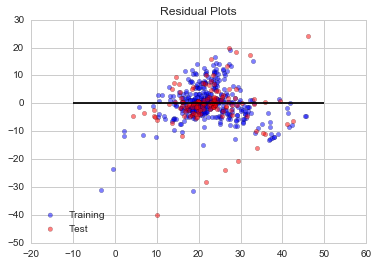

In [99]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)
# c is color, alpha is transparency.

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

**Great! Looks like there aren't any major patterns to be concerned about**, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal.

<span style="color:red">** TO check for these line occuring towards the bottom right, try removing a few features and redo LR to see if that goes away**.</span>

That's it for this lesson. Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model

# THIS IS ANOTHER DOCUMENT ON LINEAR REGRESSION

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()

# Synopsis

In this unit we will learn:

* The basic concept of a linear regression
* How to run a linear regression with statsmodels
* The different capabilities of statsmodels and scikit-learn to run regressions

# Regression Analysis

So far we've covered how you can perform basic data analysis on structured data using Pandas. However, Pandas does not have one of the most common forms of analysis for this type of data built into it --- regression analysis.

Many of you have created a linear regression before, although not all of you may know that you did it. The basic idea is pretty simple, we want to determine the linear relationship between some variable $x$ and another variable $y$. 

Sounds familiar right? All I'm describing is the equation $y = mx + b$ that we learned back in high school. This linear model describes the relationship between some independent $x$ variable and its dependent $y$.

Fitting a regression model is common in many disciplines, so I'm going to show you how to do that in Python now. I want to explain enough of the mathematical background such that everyone can follow along, but this isn't meant as a proper explanation of the underlying statistics or when you should use a regression model. If you're not familiar with this model or the underlying statistics and want to learn more I recommend this [statistics textbook](http://www.amazon.com/Statistics-4th-Edition-David-Freedman/dp/0393929728).

# But...math!

I know, so let's start with a simple, concrete example. Let's say that someone's High-School Senior GPA is almost exactly the same as their first year College GPA. This means that if we wanted to predict a student's first year gpa ($y$) we would guess based on their High school GPA ($x$). More simply, $y = x$.

I'll create that data now with Numpy where I apply some small amount of noise.

In [100]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#We turn off the latex usage in matplotlib because LaTeX doesn't know
#how to handle a '_' character without it being escaped with a backslash
#Since we use '_' in column names typically this can be a bit of a problem
#If we don't turn this off
mpl.rc('text', usetex=False)

In [101]:
#I will create 100 gpas, with a random probability
high_school_gpas = np.random.uniform(0, 4, 100)
#The college gpas are created by adding some noise
college_gpas = high_school_gpas + np.random.normal(0, 0.2, 100)

Now let's plot the relationship just so it's clear.

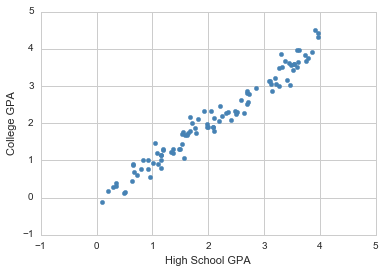

In [102]:
plt.scatter(high_school_gpas, college_gpas, color='steelblue')
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

Now let's say that we didn't create this data and we wanted to identify the relationship between High School and College GPA. We can do that by fitting a linear model to the data.

With Python we can fit a Linear Model using the `statsmodels` library. Fitting a linear model involves using [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) to identify the parameters. In this lecture I won't go over how this works, but you should look into it later if you plan on fitting linear models.

In [103]:
import statsmodels.api as sm

First what I do is add a constant to the independent dataset. Without this we are just modelling $y=mx$, instead of $y=mx+b$. Our example doesn't need this constant, but I want to show you how to do it.
This means: $y= AX$ where A=[b m] and X=[1,x]

In [104]:
X = sm.add_constant(high_school_gpas)

In [105]:
X # thhis add a nother column into the data so that you can use .fit()

array([[ 1.        ,  2.32572968],
       [ 1.        ,  2.36056257],
       [ 1.        ,  3.3310496 ],
       [ 1.        ,  2.10183677],
       [ 1.        ,  1.14696776],
       [ 1.        ,  2.74075843],
       [ 1.        ,  2.52379121],
       [ 1.        ,  1.1612968 ],
       [ 1.        ,  3.86426713],
       [ 1.        ,  3.45451351],
       [ 1.        ,  1.68219673],
       [ 1.        ,  1.18919896],
       [ 1.        ,  3.46337323],
       [ 1.        ,  3.74209275],
       [ 1.        ,  1.98211873],
       [ 1.        ,  3.10076559],
       [ 1.        ,  1.62379581],
       [ 1.        ,  2.48810173],
       [ 1.        ,  1.14856118],
       [ 1.        ,  2.58806136],
       [ 1.        ,  0.34050565],
       [ 1.        ,  1.67442752],
       [ 1.        ,  1.54875213],
       [ 1.        ,  0.83808436],
       [ 1.        ,  1.58398822],
       [ 1.        ,  0.63232546],
       [ 1.        ,  1.81579629],
       [ 1.        ,  1.99237911],
       [ 1.        ,

Now we create the ordinary least squares regression, this is our `model`

In [106]:
simdata_model = sm.OLS(college_gpas, X)

In [108]:
type(simdata_model)

statsmodels.regression.linear_model.OLS

The above model is similar to this below when we did LR for the house price.
### Import for Linear Regression
import sklearn

from sklearn.linear_model import LinearRegression
### Create a LinearRegression Object
lreg = LinearRegression()

type(lreg) #sklearn.linear_model.base.LinearRegression

Once we fit the model, this becomes our result

In [107]:
simdata_result = simdata_model.fit()

The fitted result has a number of features, but the one that we care about most is the `summary()`. This tells us about our fitted model.

In [111]:
simdata_result.summary()
#x1 is so high, this means this independent attribute is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2632.
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           1.28e-72
Time:                        17:24:34   Log-Likelihood:                 10.767
No. Observations:                 100   AIC:                            -17.53
Df Residuals:                      98   BIC:                            -12.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0895      0.048     -1.849      0.067        -0.186     0.007
x1             1.0432      0.020     51.306      0.000         1.003     1.084
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.902
Skew:                           0.218   Prob(JB):                        0.637
Kurtosis:                       2.839   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### you can also do LR on y=ax+bx^2+c too, but then you would need 3 cols: one for x, one for x^2, and
### one for the intercept c.
### since the true relationship is linear, we will have the coeff of x will be significant, while for x^2 and c are low.

Does anyone know what all of these features mean?

**That's insane if you do right now!**

Now we can plot the best-fit line along with the data.

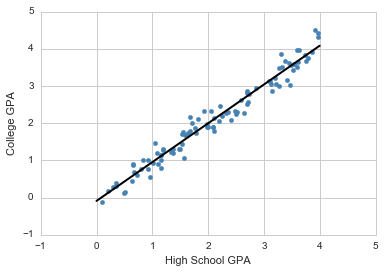

In [113]:
#Here is the data again
plt.scatter(high_school_gpas, college_gpas, color='steelblue')
#Now for our equation
sim_x = np.linspace(0, 4, 100)
sim_y = 1.0432 * sim_x - 0.0895 # change this according to the coeffs 
#you get above
plt.plot(sim_x, sim_y, color='black', linewidth=2)
#Our labelled axes
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

Pretty darn good!

## But this isn't actually real data. I've downloaded some real data that was a part of an introductory statistics textbook. Let's load that csv with Pandas right now.

In [114]:
import pandas as pd

df = pd.read_csv('./student_gpa_data.csv')

df.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1


In this dataframe we have 10 columns:

    GPA - 1st Year College GPA
    HSGPA - High School GPA
    SATV - SAT Verbal Score
    SATM - SAT Math Score
    Male - Male (1) or Female (0)
    HU - Number of credit hours earned in humanities courses in high school.
    SS - Number of credit hours earned in social science courses in high school.
    FirstGen - First Generation College Student
    White - White (1) or Other Ethnicity (0) 
    CollegeBound - 1 = attended a high school where >=50% students intended to go on to college, 0 = otherwise
    
But right now, let's just look at the relationship between High School GPA and College GPA like we did previously.

## Like always we should take a look at the raw data before we try to model it.

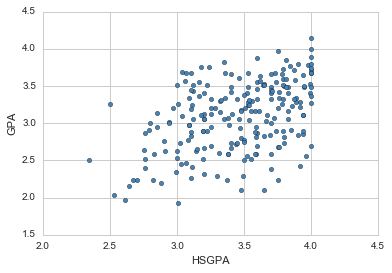

In [115]:
df.plot(kind='scatter', x = 'HSGPA', y = 'GPA', color='steelblue')

Yikes! Looks like my initially generated data was a bit optimistic....

Let's try fitting a linear model to this dataset and see what it looks like.

Now here's a cool thing, there are actually **two ways to run regressions with statsmodels**. The first one is by importing the vanilla `statsmodels` from <span style="color:red">`statsmodels.api`</span>. The other way is by calling `statsmodels` formulas, which are from `statmodels.formula.api`. Why is there this crazy naming scheme? ...I can't really tell you actually.

In [116]:
import statsmodels.formula.api as smf
#before, it was:
# import statsmodels.api as sm

## The great thing about the formula is that it works directly with a Dataframe! We just have to learn a little bit of syntax. I'll show you how it works first.

In [117]:
realdata_model = smf.ols(formula = 'GPA ~ HSGPA', data = df)
# this is a good way to do, only need to write the columns names.

We can **type out a linear formula** and it will **automatically add the constant that we previously had to add manually**. When we write a formula it is set up as:

    dependent variable = independent variable
    
but the equals sign is replaced by a `~`. 

**All we need to do is tell it the name of the columns in the dataframe that we want it to use in the model.**

We also tell the model that the data is coming from the dataframe.

Now we can fit the model just like before.

In [118]:
realdata_result = realdata_model.fit()
realdata_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.78e-12
Time:                        20:14:17   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1799      0.262      4.504      0.000         0.664     1.696
HSGPA          0.5550      0.075      7.359      0.000         0.406     0.704
==============================================================================
Omnibus:                        5.915   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.952
Skew:                          -0.279   Prob(JB):                       0.0841
Kurtosis:                       2.518   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
realdata_result.params['HSGPA']# slope of the only feature we used: HSGPA

0.55501249727906621

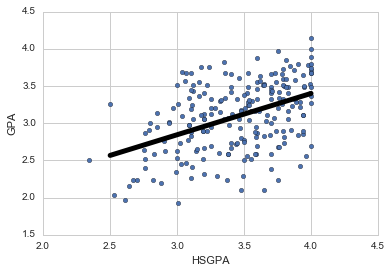

In [120]:
ax =df.plot(kind='scatter',x='HSGPA', y='GPA')

x=np.linspace(2.5,4.0,20)
y=realdata_result.params['HSGPA'] * x + realdata_result.params['Intercept']
#cool! just y=mx+b
ax.plot(x,y,color='black', linewidth=5)

### Recommend to use the above method to reduce user's error due to its simplicity

In [121]:
# previously, we use the simple formula 'GPA ~ HSGPA' 
#realdata_model = smf.ols(formula = 'GPA ~ HSGPA', data = df)

# you can create any function you want too
smf.ols(formula = 'GPA ~ HSGPA + FirstGen', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     33.02
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.06e-13
Time:                        20:22:06   Log-Likelihood:                -113.56
No. Observations:                 219   AIC:                             233.1
Df Residuals:                     216   BIC:                             243.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1597      0.257      4.514      0.000         0.653     1.666
HSGPA          0.5698      0.074      7.690      0.000         0.424     0.716
FirstGen      -0.2717      0.087     -3.118      0.002        -0.443    -0.100
==============================================================================
Omnibus:                        7.440   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.868
Skew:                          -0.299   Prob(JB):                       0.0532
Kurtosis:                       2.465   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# you can create any function you want too
import numpy as np

smf.ols(formula = 'GPA ~ HSGPA + np.power(HSGPA,2)', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     27.09
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.18e-11
Time:                        20:22:43   Log-Likelihood:                -118.27
No. Observations:                 219   AIC:                             242.5
Df Residuals:                     216   BIC:                             252.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.2211      2.040      0.108      0.914        -3.800     4.242
HSGPA                  1.1317      1.219      0.928      0.354        -1.271     3.535
np.power(HSGPA, 2)    -0.0856      0.181     -0.474      0.636        -0.442     0.270
==============================================================================
Omnibus:                        5.838   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.939
Skew:                          -0.281   Prob(JB):                       0.0846
Kurtosis:                       2.525   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:

smf.ols(formula = 'GPA ~ HSGPA * SATM + FirstGen', data = df).fit().summary()
# so being a first generation has a negative effect.
# SATM is SAT math score

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     17.32
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           2.53e-12
Time:                        20:23:01   Log-Likelihood:                -112.07
No. Observations:                 219   AIC:                             234.1
Df Residuals:                     214   BIC:                             251.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3605      2.326      1.015      0.311        -2.224     6.945
HSGPA          0.1074      0.677      0.159      0.874        -1.227     1.441
SATM          -0.0018      0.004     -0.491      0.624        -0.009     0.005
HSGPA:SATM     0.0007      0.001      0.658      0.511        -0.001     0.003
FirstGen      -0.2524      0.089     -2.828      0.005        -0.428    -0.076
==============================================================================
Omnibus:                        7.445   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.092
Skew:                          -0.316   Prob(JB):                       0.0475
Kurtosis:                       2.481   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

First, we might notice the difference in the slope between the simulated data model line and the real data model line. We can show that here

Remember that the slope of a line is defined as the rise over the run (or $\frac{\Delta y}{\Delta x}$)?

This plot shows that in the fake data for every point increase in High School GPA there was an **equal** point increase in College GPA.

In the real data, the slope of the line is not as steep - meaning that the College GPA *rises* less than the High School GPA *runs*. So if a student had a High School GPA of 4.0, we would predict a College GPA of 3.4. 

In [124]:
realdata_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     54.15
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.78e-12
Time:                        20:25:43   Log-Likelihood:                -118.38
No. Observations:                 219   AIC:                             240.8
Df Residuals:                     217   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1799      0.262      4.504      0.000         0.664     1.696
HSGPA          0.5550      0.075      7.359      0.000         0.406     0.704
==============================================================================
Omnibus:                        5.915   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.952
Skew:                          -0.279   Prob(JB):                       0.0841
Kurtosis:                       2.518   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Next we should notice that this model doesn't explain nearly as much of the real data as the synthetic data. We can tell this by the R-squared value. 

## With real data, high school GPA only predicts 20% of the variance in college GPA.

This becomes a bit more intuitive when we plot the regression line against the data.

In [125]:
firstgen_result = smf.ols(formula ='GPA ~ HSGPA + FirstGen', data =df).fit()
firstgen_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     33.02
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.06e-13
Time:                        20:27:27   Log-Likelihood:                -113.56
No. Observations:                 219   AIC:                             233.1
Df Residuals:                     216   BIC:                             243.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1597      0.257      4.514      0.000         0.653     1.666
HSGPA          0.5698      0.074      7.690      0.000         0.424     0.716
FirstGen      -0.2717      0.087     -3.118      0.002        -0.443    -0.100
==============================================================================
Omnibus:                        7.440   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.868
Skew:                          -0.299   Prob(JB):                       0.0532
Kurtosis:                       2.465   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

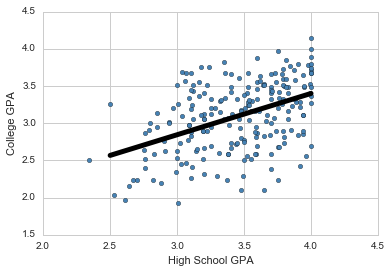

In [128]:
#Here is the data again
ax = df.plot(kind='scatter', x = 'HSGPA', y = 'GPA', color='steelblue')
#Now for our equation
#plt.plot(real_x, real_y, color='black', linewidth=2)
x=np.linspace(2.5,4.0,20)
y=realdata_result.params['HSGPA'] * x + realdata_result.params['Intercept']
ax.plot(x,y,color='black', linewidth=5)
#Our labelled axes
plt.ylabel('College GPA')
plt.xlabel('High School GPA')

#ax =df.plot(kind='scatter',x='HSGPA', y='GPA')

### We can tell by looking at the data, that there is much more 'spread' or *variability* in the vertical axis than the line accounts for. This makes sense given the definition of the [$R^2$ coefficient](https://en.wikipedia.org/wiki/Coefficient_of_determination). This measure compares the distance from each point to the fitted line against the total variability in the dependent data. We would have $R^2=1.0$ if all of the datapoints sat directly on the predicted line.

### This means that in the real world, High School GPA is not solely predictive of a student's College GPA.

I wonder why?

Maybe it's because some students may be bored with regular instruction in High School and don't pay attention or turn in assignments. Maybe if we used both the High School GPA and the SAT scores we would be able to predict the College GPA better.

In [129]:
test_scores_model = smf.ols(formula='GPA ~ HSGPA + SATV + SATM', data=df)
test_scores_result = test_scores_model.fit()
test_scores_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     23.43
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.67e-13
Time:                        20:32:39   Log-Likelihood:                -111.80
No. Observations:                 219   AIC:                             231.6
Df Residuals:                     215   BIC:                             245.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5878      0.327      1.798      0.074        -0.057     1.232
HSGPA          0.4962      0.075      6.589      0.000         0.348     0.645
SATV           0.0012      0.000      2.946      0.004         0.000     0.002
SATM           0.0001      0.000      0.341      0.733        -0.001     0.001
==============================================================================
Omnibus:                        4.495   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.477
Skew:                          -0.188   Prob(JB):                        0.176
Kurtosis:                       2.511   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interesting! Judging by the $R^2$, there was a minor increase in how well this new model fits the data. However, the results weren't quite what we expected!

There is a *small* but *significant* positive relationship between the SAT Verbal score and a student's First Year College GPA. However, there is *no significant* relationship with the SAT Math score.

Guess being good at math only goes so far, huh?

### Well, if our SAT test scores only have a very minor effect on our College GPA I wonder what being a first generation college student will do. It's possible that people who are the first in their family to go to college work harder than those of us who had parents go.

In [130]:
firstgen_model = smf.ols(formula='GPA ~ HSGPA + SATV + FirstGen', data=df)
firstgen_result = firstgen_model.fit()
firstgen_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     25.60
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           3.35e-14
Time:                        20:34:07   Log-Likelihood:                -109.33
No. Observations:                 219   AIC:                             226.7
Df Residuals:                     215   BIC:                             240.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7160      0.295      2.427      0.016         0.135     1.297
HSGPA          0.5185      0.075      6.918      0.000         0.371     0.666
SATV           0.0010      0.000      2.911      0.004         0.000     0.002
FirstGen      -0.1998      0.089     -2.241      0.026        -0.376    -0.024
==============================================================================
Omnibus:                        6.028   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.446
Skew:                          -0.224   Prob(JB):                        0.108
Kurtosis:                       2.464   Cond. No.                     6.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Guess I was wrong! Being a first generation college student has a *significant, negative* relationship with College GPA.

Now let's plot this model. 

But wait, how do we plot it now that the x-axis has three components and isn't just the High School GPA?

What we do is calculate the x position for each data point we have and then plot that x-value against the College GPA.

Let's write that function now.

In [31]:
#YOur code here

And now we will `apply` it to the dataframe. I haven't covered how to do this yet, but I will now!

In Pandas we can `apply` our own functions to a dataframe. We can apply them to a single column (in which case the input value to the function is a single variable) or to the entire dataframe (in which case the input value to the function is a `Series` and is either a row or column in the dataframe).

Here I need to access multiple columns of data for each student so I will `apply` the `calculate_firstgen_x_value()` function to the entire dataframe. I also want to calculate each student's value so I need to apply this to the rows. To pick `rows` instead of columns we need to change the `axis` argument to `1`.

Since I want to keep this value I'll set the output equal to a new column name.

In [32]:
df['firstgen_model'] = df.apply(calculate_firstgen_x_value, axis = 1)

df.head()

NameError: name 'calculate_firstgen_x_value' is not defined

KeyError: 'firstgen_model'

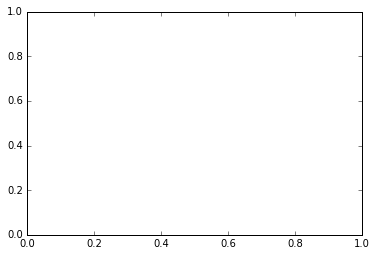

In [33]:
df.plot(kind='scatter', x='firstgen_model', y='GPA', color='steelblue')

We can see that when we transform the x data values the spread in the y-axis is much smaller than when we first modeled the relationship between College GPA and the High School GPA.

Of course, we could also use the built-in plotting from `statsmodels` too. It will only show a single independent variable at a time, but it's a really quick way to plot!

The first plot we can use is with `plot_fit()`. The `plot_fit()` funciton shows the real data points and the predicted data point (with confidence intervals).

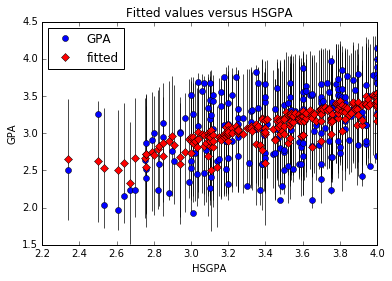

In [34]:
sm.graphics.plot_fit(firstgen_result, 'HSGPA');

The other plotting function is more of a diagnostic one for users to evaluate how good their model is. It's the `plot_regress_exog` function.

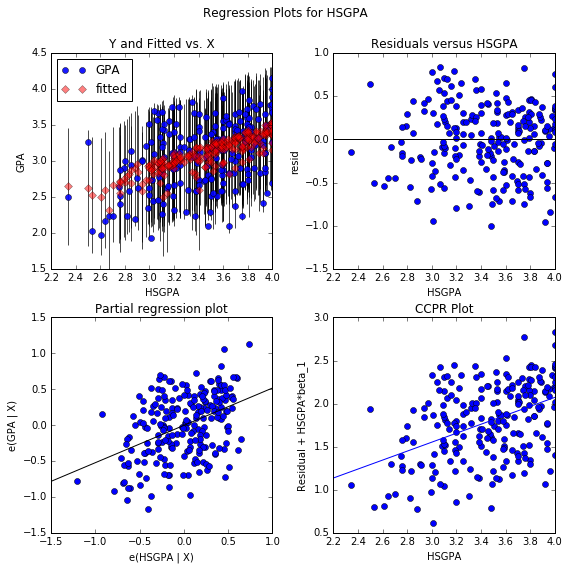

In [36]:
fig = plt.figure(figsize = (8,8))
sm.graphics.plot_regress_exog(firstgen_result, 'HSGPA', fig=fig);

# Regression methods in Python

Statsmodels has more built into than basic linear regression though. It also has:

    * Generalized Linear Models (Regression with a defined distribution link - logit and probit are in this category)
    * Generalized Estimating Equations (GLM with correlation)
    * Linear Mixed Effects models)
    * Hazard Regression
    * Kernel Regression
    * Generalized Method of Moments
    * Time Series analysis (ARMA, ARIMA, VARMA, VAR)
    
However, if you're looking for some of the newer machine-learning based regression techniques such as:

    * LASSO (Least Absolute Shrinkage and Selection Operator)
    * Ridge Regression
    * Random Forest Regression
    * Support Vector Regression
    
Then you'll need to use `scikit-learn` instead. Scikit Learn also duplicates some of the functions that are contained within `statsmodels` (linear regression, logistic regression, ...., [full list here](http://scikit-learn.org/stable/modules/linear_model.html). One downside of using scikit-learn is that it isn't integrated with Pandas as well as statsmodels (for now, that will likely change in the future).

As an example, we'll show a LASSO regression with scikit-learn.

In [37]:
df

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1
5,2.95,3.25,600,570,0,18.0,3.0,0,1,1
6,3.60,3.79,710,630,0,5.0,19.0,0,1,1
7,2.87,3.60,390,570,0,10.0,0.0,0,0,0
8,3.67,3.36,630,560,0,8.5,15.5,0,1,1
9,3.49,3.70,680,670,0,16.0,12.0,0,1,1


In [ ]:
from sklearn import linear_model

#First we instantiate the mdoel
clf = linear_model.Lasso(alpha = 0.1)

#Create the X and Y variable sets - must be numpy arrays!
y = df.GPA.values
x = df.loc[:, 'HSGPA':'CollegeBound'].values
#Fit the model
clf.fit(x, y)
#Get the parameters
for param_name, param_value in zip(df.columns[1:-1], clf.coef_):
    print(param_name, param_value)

# <span style="color:red">SECTION 3: LINEAR REGRESSION</span>
(By Frank)

### First, some notes:

* First of all, I don't know why they call it "regression". It's really misleading. <span style="color:red">**You can use it to predict points in the future, the past, whatever. In fact, time usually has nothing to do with it**.</span>
* Even though in his example, Frank showed a line fit in the range x=[40,100], and he said that if we have a new data point say x=120 then we can use the line obtain in the range x=[40,100] to predict the new value y corresponding to x=120. <span style="color:red">**BUT again as we mentioned before, this might not be valid. In many cases, we cannot LR to extrapolate points out of the range we use to learn the fitting curve.**</span>
![caption](./SLR_Frank_how_does_it_work.png)
![caption](./SLR_Frank_OLS_vs_MAP.png)
![caption](./SLR_Frank_OLS_vs_other_methods.png)
![caption](./SLR_Frank_how_eval_results.png)
* Note that again: R^2 = 1- (SSE/SST) = SSR/SST, where:
    * SSE: sum of squares error/residuals (part of the variation in Y that cannot be explained by our LR model)
    * SSR: sum of squares regression (part of variation in Y that is explained by our regression model)
    * SST: sum of squares total, SST = SSE + SSR (total variation in Y)

* Again, you can choose r^2 to select the order of the polynomial used to fit the data (from 1 to..., but don't go too high, when you will overfit the data)

Let's fabricate some data that shows a roughly linear relationship between page speed and amount purchased:

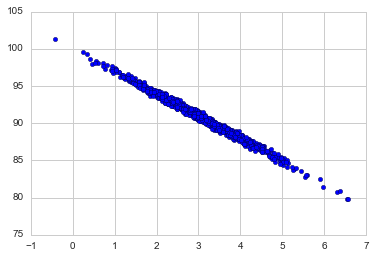

In [131]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000) # is our x
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3 # is y
# just created a linear relation with some random noises

scatter(pageSpeeds, purchaseAmount)

## As we only have ONE features, we can keep it simple and just use scipy.state.linregress:

In [132]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)
# slope=m, intercept=b in the line equation: y=mx+b
# r_value is used to calculate r_squared = r_value^2, the measure of best fit
# dont' need to know p_value, std_err for now

In [133]:
slope

-3.0050951488925808

In [134]:
intercept

100.00040593085804

In [135]:
r_value

-0.99494134602493844

In [136]:
p_value

0.0

In [137]:
std_err

0.009604572305162597

### Not surprisngly, our R-squared value shows a really good fit:

In [138]:
r_value ** 2
#give almost 1, which is very good, i.e. even though there is some variance
#around that line, the line captures the variance.
# there is roughly equal amount of variation on both sides of the line
# so this is a good fit for the data that we have

0.98990828202991632

Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

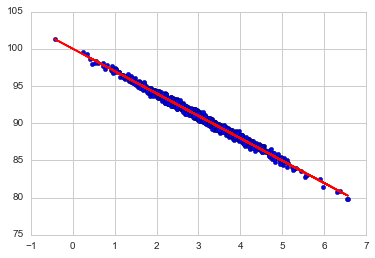

In [139]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds) # pageSpeeds is just our x axis

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

## Activity

Try increasing the random variation in the test data, and see what effect it has on the r-squared error value.

# <span style="color:red">SECTION 4: POLYNOMIAL REGRESSION</span> (Frank)
(but still **1 feature** only)

## Tool use: np.polyfit()

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

### Basically we create y=50/x. Technically, this is not a polynomial function. But whatever, the purpose is to see how to use, in fact, POLYNOMIAL of certain degree, to fit this non-polynomial function

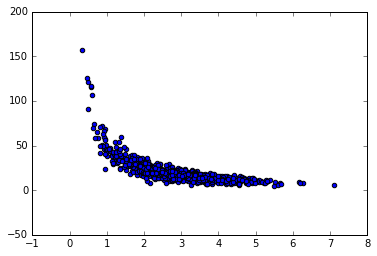

In [1]:
%matplotlib inline
from pylab import *

np.random.seed(2) # to have the same result every time you run
# important when you need to go back later to compare between different fits

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds
# this time we create another relationship that is not linear like last time.

scatter(pageSpeeds, purchaseAmount)

**numpy has a handy polyfit function we can use**, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial: (note that **using 1 would mean we are back to simple LR**)

In [2]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

# first, use np.polyfit() to compute all the coeffs of the poly, return is a np array of those coeffs
# then use np.poly1d to convert that np.array of coeffs into an actually np poly object
# so that later we can simply give the x value to this p4 object and it will calculate y automatically
p4 = np.poly1d(np.polyfit(x, y, 4)) #4-deg poly fit to this data

In [14]:
np.polyfit(x, y, 4)

array([   0.54005597,   -8.85641318,   52.25378374, -135.34422815,
        147.6050662 ])

In [15]:
type(np.polyfit(x, y, 4))

numpy.ndarray

In [3]:
p4#so, p4 is now a numpy poly (1d) object instead of just a numpy array of the coeffs of the poly

poly1d([   0.54005597,   -8.85641318,   52.25378374, -135.34422815,
        147.6050662 ])

In [4]:
type(p4)

numpy.lib.polynomial.poly1d

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

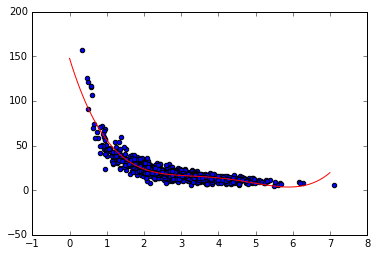

In [5]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

## Looks pretty good! Let's measure the r-squared error:

In [6]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x)) # the built-in function to return your r-squared value

print(r2) 
# 0.829 is not too bad!

0.82937663963


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

In [7]:
p10 = np.poly1d(np.polyfit(x, y, 10))


In [8]:
p10

poly1d([ -2.27083623e-03,   6.99344570e-02,  -8.73574128e-01,
         5.46374836e+00,  -1.52133147e+01,  -1.13668345e+01,
         2.22415581e+02,  -7.22753408e+02,   1.16232579e+03,
        -9.80298946e+02,   3.87995731e+02])

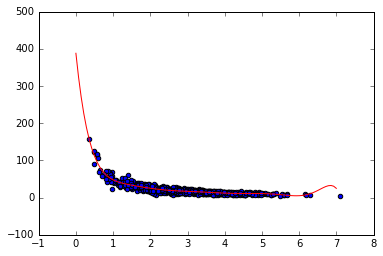

In [9]:
plt.scatter(x, y)
plt.plot(xp, p10(xp), c='r')
plt.show()

In [10]:
r2_10 = r2_score(y, p10(x)) # the built-in function to return your r-squared value

print(r2_10) 

0.883217235626


Try 100-degree poly

C:\Users\Tho7\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


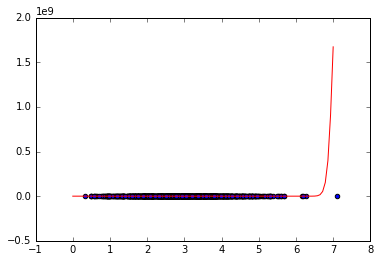

In [12]:
p100 = np.poly1d(np.polyfit(x, y, 100))
plt.scatter(x, y)
plt.plot(xp, p100(xp), c='r')
plt.show()

In [13]:
r2_100 = r2_score(y, p100(x)) # the built-in function to return your r-squared value

print(r2_100) 

0.884966416082


![caption](./PLR_Frank_overfit.png)

# <span style="color:red">SECTION 5: MULTIVARIATE REGRESSION</span> (Frank)

## Tool used: statsmodel package (need to convert qualitative features to quantitative before using)

Example: **predicting a car price based on its many attributes (body style, brand, mileage, etc.)**
* Some of these features might be more important than the other, but still the idea is to fit multiple features in the model and find out which are more important.
* **The idea in computer science is to do the simplest thing that works, don't over-complicate it!** Because it's usually the simple model that works the best, so if you can find the right amount of complexity, but no more, then that is usually the model to go with! ** Also, remember the independence assumption between the features. In many cases this is not true, but keep that in mind!**
![](./MLR_Frank_still_OLS.png)

Let's grab a small little data set of Blue Book car values:

In [16]:
import pandas as pd # due with tabular data easily.
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
# df = pd.read_excel('./cars.xls') # I downloaded the file to the current folder, in case the site is down

In [18]:
#df = pd.read_excel('./cars.xls')

In [19]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


We can use pandas to **split up this matrix** into **the feature vectors** we're interested in, and **the value** we're trying to predict.

Note how we use **pandas.Categorical** to **convert textual category data (model name) into an ordinal number** that we can work with.

### This is basically called setting up a dummy variable for features that are "qualitatively" instead of what we usually see "quantitatively"

In [21]:
import statsmodels.api as sm

df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Doors']]
y = df[['Price']]

In [26]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Model_ord
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,10
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,10
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,10
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,10
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,10


In [27]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Model_ord
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,21
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,21
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,21
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,21
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,21


In [28]:
df[5:10]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Model_ord
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,10
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,10
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,10
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,10
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,10


In [23]:
df.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [29]:
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit() # Ordinary Least Square

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Wed, 26 Oct 2016   Prob (F-statistic):           1.98e-07
Time:                        16:00:34   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000      2.77e+04  3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000        -0.259    -0.095
Model_ord    -39.0387     39.326     -0.993      0.321      -116.234    38.157
Doors      -1652.9303    402.649     -4.105      0.000     -2443.303  -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <span style="color:red"> Important to note that a coeff with high magnitude doesn't mean the corresponding feature is more important/has more effect. We need to take into account the unit/scale of that feature as well.</span>

That says, if you normalized all the features to between 0 and 1, then you can say that the feature with higher absolute value of estimated coefficient will have higher impact on the result.

* **Here the r^2 value is very small, so this is not a good model as well.**

The table of coefficients above gives us the values to plug into an equation of form:
    B0 + B1 * Mileage + B2 * model_ord + B3 * doors
    
But in this example, it's pretty clear that <span style="color:red">**mileage is more important than anything based on the std err's.**</span>

Could we have figured that out earlier? (yes, by **visualization**, yes we hear that word here again! By doing some slicing, plotting in the beginning we could predict this without having to do any learning)

In [30]:
y.groupby(df.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749


Surprisingly, more doors does not mean a higher price! So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

# <span style="color:red">SECTION 6: MULTI-LEVEL MODELS</span> (Frank)

** Mention this since it may be in the job interviews. It is a hard topic, but very practical. Here, we just attempt to introduce the concept and point to the references

![](./MLR_Frank_multi-level_models.png)
![](./MLR_Frank_multi-level_models_modeling.png)
![](./MLR_Frank_multi-level_models_ref.png)

# <span style="color:red">SECTION 7: Brief intro into Unsupervised Learning</span> (Frank)

* ** Why use it?** Maybe we don't know what we are looking for - e.g. you are looking for <span style="color:red">latent variables</span>. 
* E.g. clustering users on a dating site based on their info and behav. Perhaps you'll find there are groups of people that emerge that don't conform to your known stereotypes.
* E.g. Cluster movies based on their properties. Perhaps our current concepts of genre are outdated?
* Analyze the text of product descriptions to find the terms that carry the most meaning for a certain category.
* This is different from Supervised Learning, in which you can used train/test method and then evaluate the model using r^2 value (or other metrics).

## For SL only:
* Need to ensure both train/test sets are **large enough** to contain representatives of all the variations and outliers in the data you care about.
* The data sets must be selected **randomly**.
* Train/test is a great way to guard against **overfitting**.
* <span style="color:red">Caveat</span>: **Train/test may fail too**:
    * Maybe your sample sizes are too **small**.
    * Or due to random chance, you train and test sets look remarkably **similar**.
    * **Overfititng** can still happen.
    * <span style="color:red">Solution</span>: K-fold CV
        * One way to further protect against overfitting. Simple idea:
        * Split your data into K randomly-assigned segments.
        * Reserve one segment as your test data.
        * Train on each of the remaining K-1 segments and measure their performance against the test set.
        * Take the average of the K-1 r-squared scores

## As an example, let's use PolyR to demonstrate how train/test can be used to select the right power of the poly.

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

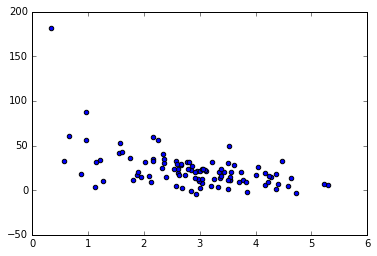

In [33]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds
# kind of exponetial relationship


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [34]:
# here, you 100 data points were already generated randomly, so there's
# no need to shuffle the data points before you segment it as following
# however, for real data set you might want o considering shuffling
# the data to make it random before segmenting.
# YOU CAN DO THAT BY using random.shuffle()

# also, if you are using pandas then they have built-in function to
# do that for you. Here we're just using simple Python list

trainX = pageSpeeds[:80] #0 to 79
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80] #80 to 99
testY = purchaseAmount[80:]

In [37]:
type(trainX)

numpy.ndarray

In [38]:
trainX

array([ 2.58324215,  2.94373317,  0.8638039 ,  4.64027081,  1.20656441,
        2.15825263,  3.50288142,  1.75471191,  1.94204778,  2.09099239,
        3.55145404,  5.29220801,  3.04153939,  1.88207455,  3.53905832,
        2.4038403 ,  2.9808695 ,  4.17500122,  2.25212905,  3.00902525,
        2.12189211,  2.84356583,  3.25657045,  2.01122095,  2.66117803,
        2.76381597,  2.36234499,  1.81238771,  1.57878277,  2.8465048 ,
        2.73094304,  5.23136679,  0.56523242,  3.1127265 ,  3.37044454,
        4.35963386,  3.50185721,  2.1557863 ,  3.00000976,  3.54235257,
        2.6864918 ,  3.77101174,  1.13190935,  4.73118467,  4.46767801,
        2.66432266,  3.61134078,  3.04797059,  2.17086471,  3.08771022,
        4.00036589,  2.61890748,  2.62433058,  2.92552924,  3.43349633,
        4.27837923,  2.36532069,  3.50839624,  3.21611601,  1.14138761,
        2.58068352,  2.8676711 ,  2.96042976,  3.32600343,  0.95967695,
        3.04625552,  2.32232442,  1.56056097,  3.52429643,  3.73

In [39]:
x=np.array(trainX)

In [40]:
x # I see no diference at all!

array([ 2.58324215,  2.94373317,  0.8638039 ,  4.64027081,  1.20656441,
        2.15825263,  3.50288142,  1.75471191,  1.94204778,  2.09099239,
        3.55145404,  5.29220801,  3.04153939,  1.88207455,  3.53905832,
        2.4038403 ,  2.9808695 ,  4.17500122,  2.25212905,  3.00902525,
        2.12189211,  2.84356583,  3.25657045,  2.01122095,  2.66117803,
        2.76381597,  2.36234499,  1.81238771,  1.57878277,  2.8465048 ,
        2.73094304,  5.23136679,  0.56523242,  3.1127265 ,  3.37044454,
        4.35963386,  3.50185721,  2.1557863 ,  3.00000976,  3.54235257,
        2.6864918 ,  3.77101174,  1.13190935,  4.73118467,  4.46767801,
        2.66432266,  3.61134078,  3.04797059,  2.17086471,  3.08771022,
        4.00036589,  2.61890748,  2.62433058,  2.92552924,  3.43349633,
        4.27837923,  2.36532069,  3.50839624,  3.21611601,  1.14138761,
        2.58068352,  2.8676711 ,  2.96042976,  3.32600343,  0.95967695,
        3.04625552,  2.32232442,  1.56056097,  3.52429643,  3.73

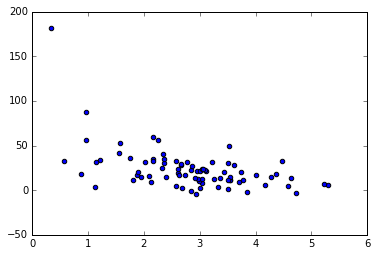

In [35]:
scatter(trainX, trainY)
# look pretty similar to our data set, so that's good

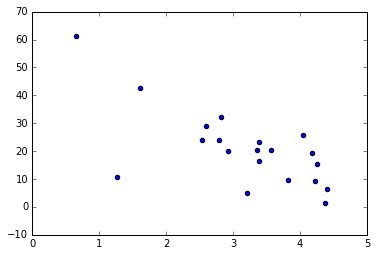

In [36]:
scatter(testX, testY)
# also have similar shape as our data, so that's good too
# you would probably have better shape if you have 1000 points instead of 100

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [41]:
x = np.array(trainX) # need to convert from list to np.array
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8)) # x,y are training set
# p4 function is now can be used to predict new values

Let's plot our polynomial against the training data:

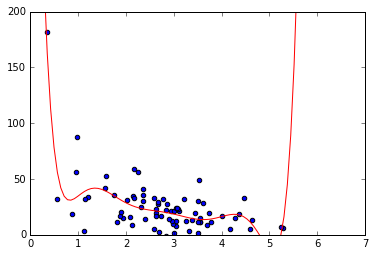

In [42]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes() # so that you now have the variable axes to set limit later
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r') #plot our predicted values
plt.show()
# cleary it's overfitting here. If we have our real data then it would not
# be that high at the two ends
# so it fits the data really well, but do terribly in predicting new values

And against our test data: (i.e. use the above models learned from the train data to predict data from our test data

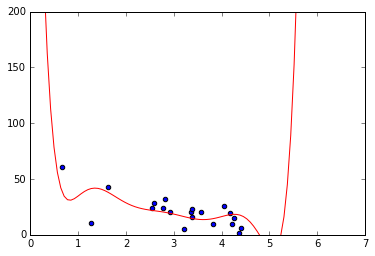

In [43]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

# a reasonably fit, but far from perfect

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))
# testy is real data, p4(testx) is predicted data

print(r2)

0.300181686118


...even though it fits the training data better:

In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

# better, but not suprising, since we trained it on this training set. And actually, 0.64 is still
# not a high r^2 score for a training set!

0.642706951469


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

In [48]:
max_order = 10
r2_train = []
r2_test = []

for i in range(max_order):
    p = np.poly1d(np.polyfit(x, y, i+1))
    r2_train.append(r2_score(np.array(trainY), p(np.array(trainX))))
    r2_test.append(r2_score(testy, p(testx)))


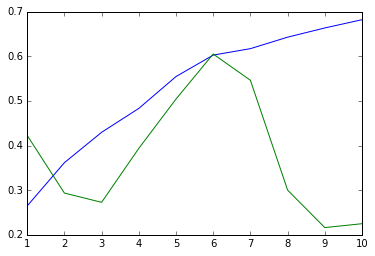

In [50]:
plot(range(1,max_order+1), r2_train)
plot(range(1,max_order+1), r2_test)

### <span style="color:red">Haha, now you see that the r^2 of training set always increase in the order (as overfitting is more likely), but this is not true for r^2 of testing set. i.e. from the figure, the optimal order of the polyregression is 6</span>

** That's why we see when we initially choose the order=8, we see some overfit**